<a href="https://colab.research.google.com/github/shruti05jain/CodeSpaze/blob/main/DataProcessingAndEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install panda


In [5]:
pip install pandas numpy matplotlib seaborn


In [7]:
import pandas as pd

# Replace with your dataset URL or file path
df = pd.read_csv('/content/HousePricePrediction.xlsx - Sheet1.csv')

In [8]:
# Impute missing values with the mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# Alternatively, drop rows with missing values
df.dropna(inplace=True)

TypeError: can only concatenate str (not "int") to str

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Dataset shape: (2919, 13)
Missing values:
Id                 0
MSSubClass         0
MSZoning           4
LotAre

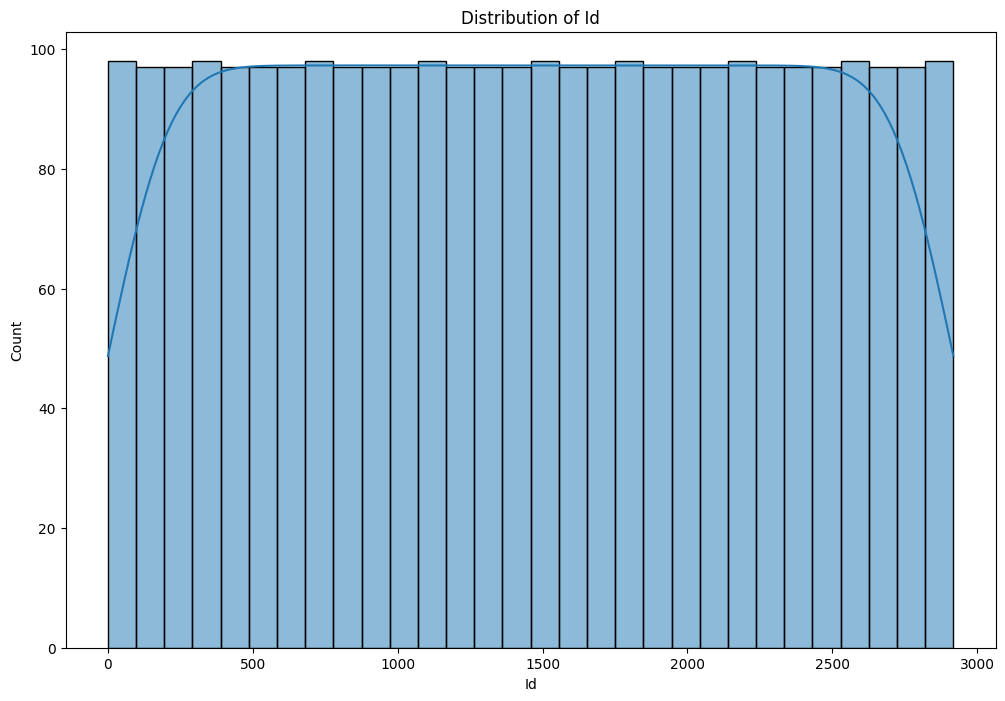

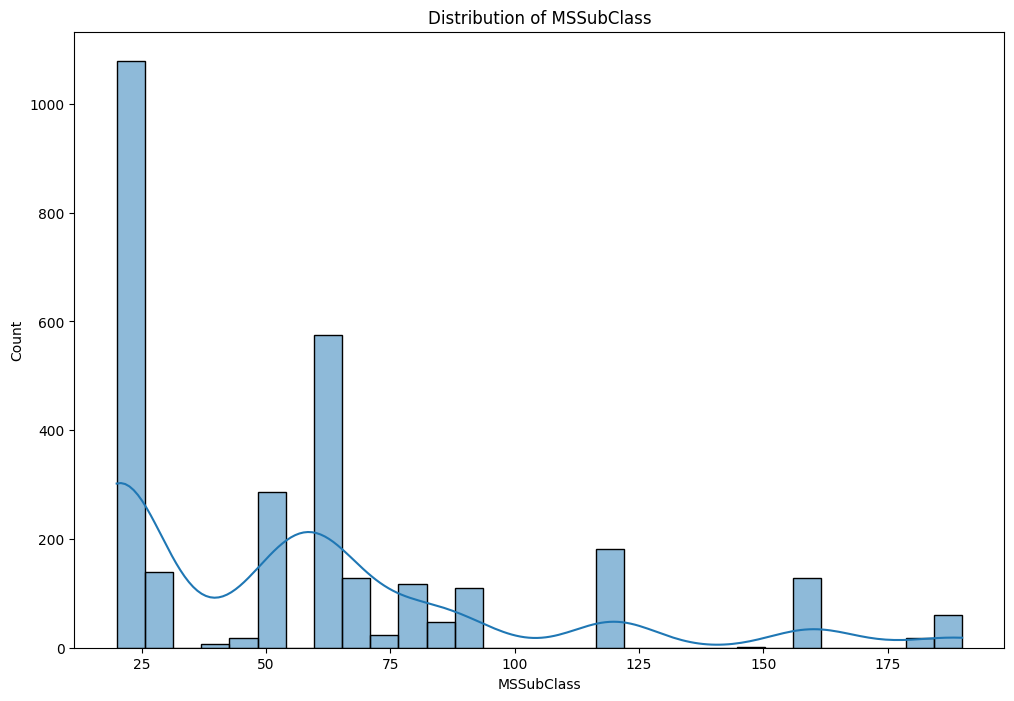

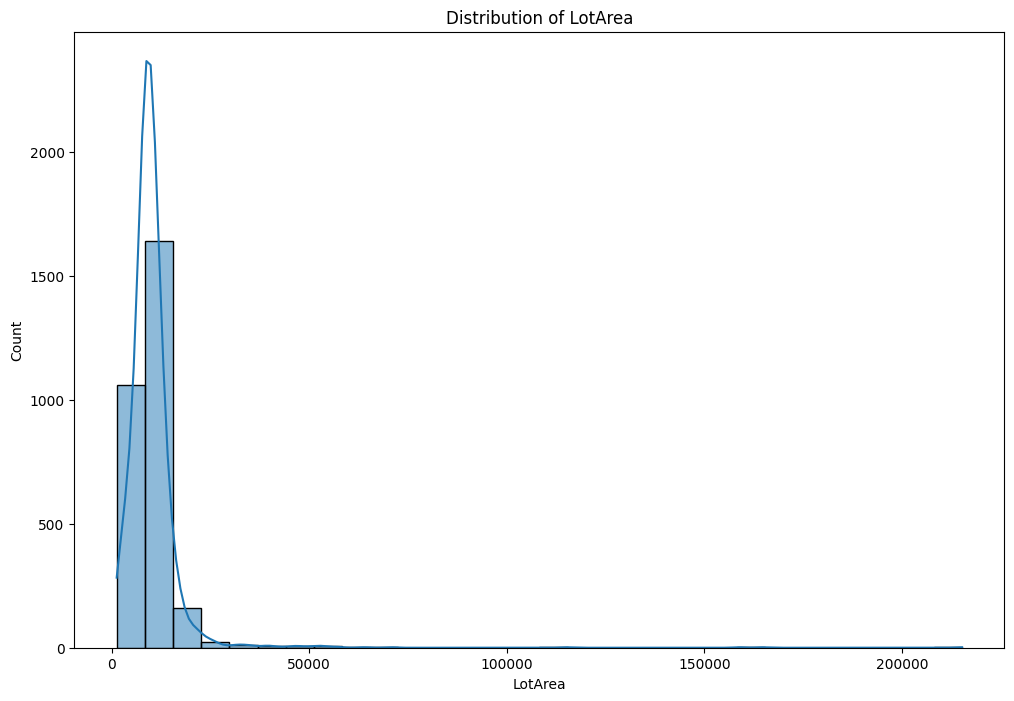

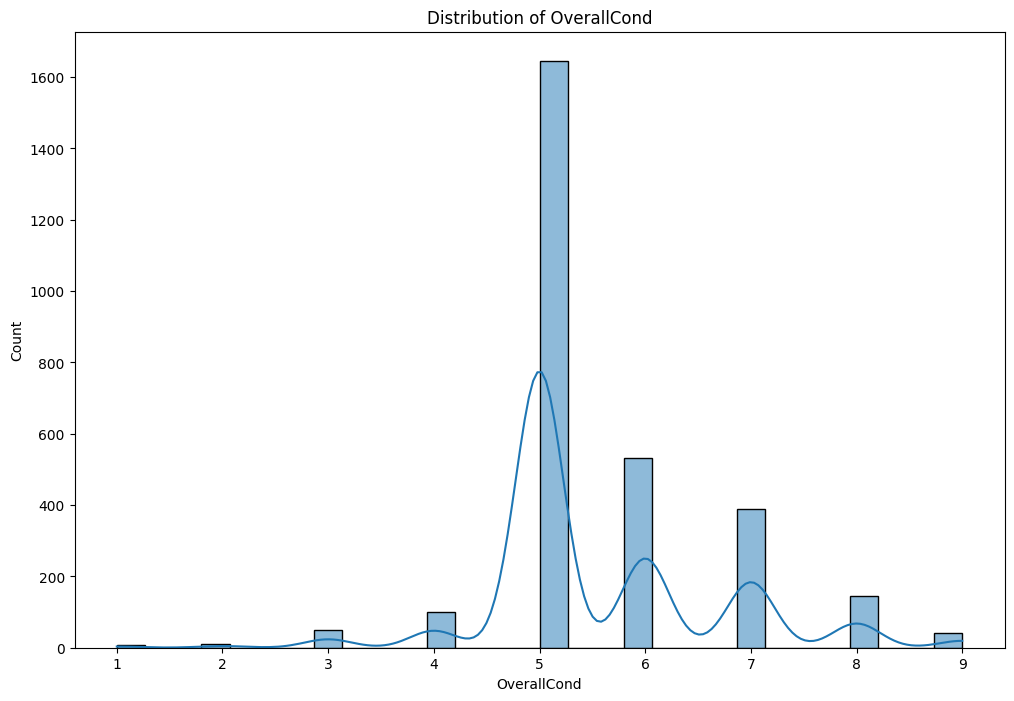

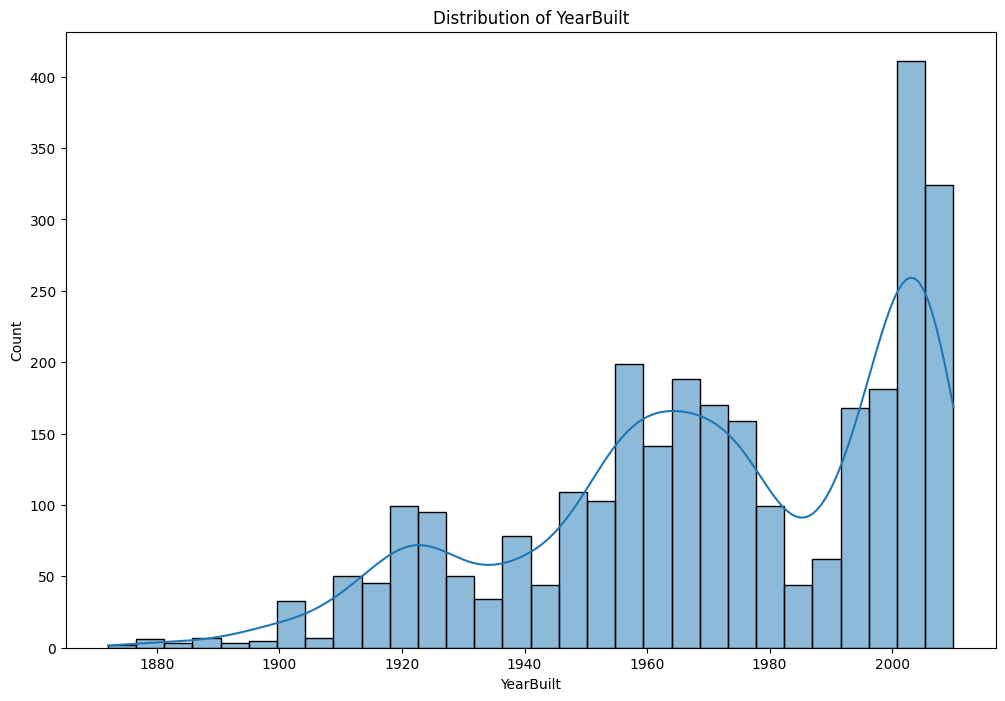

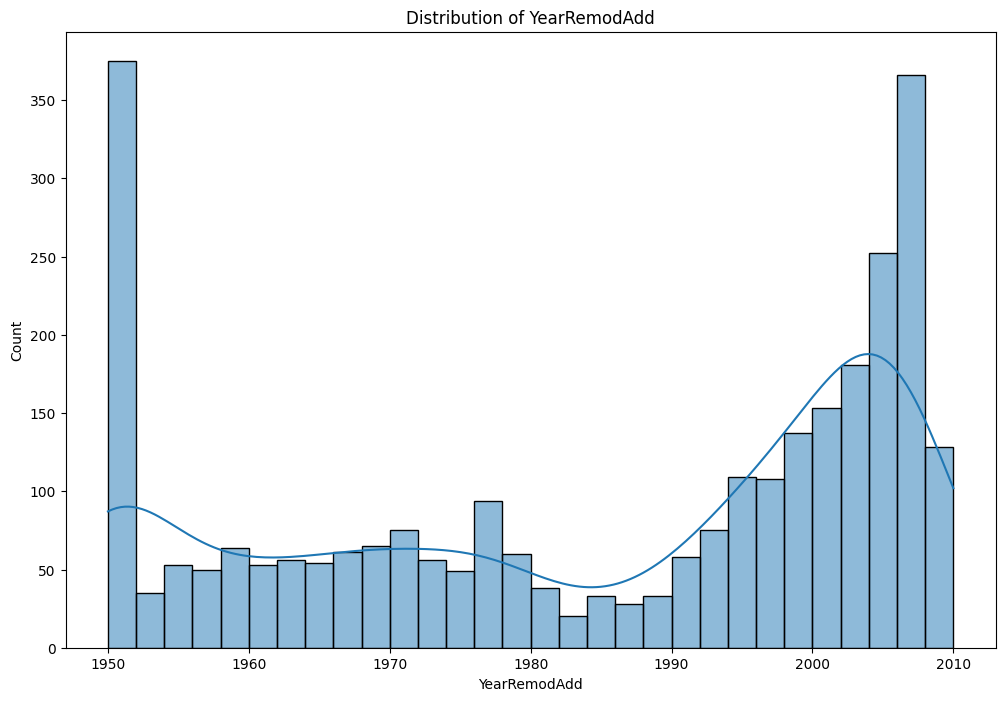

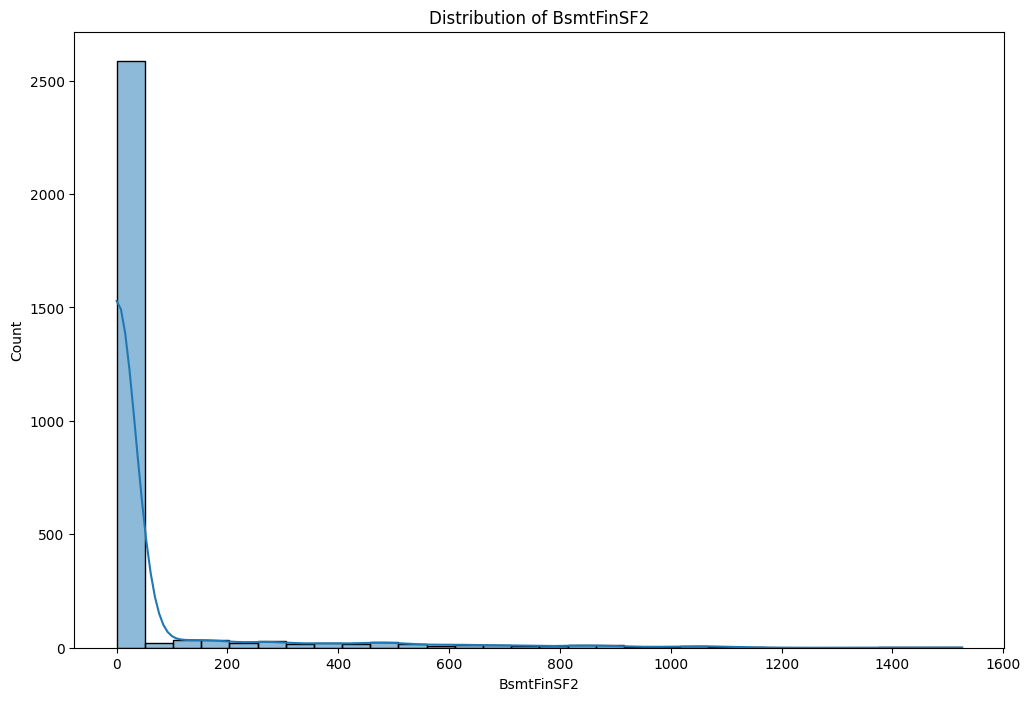

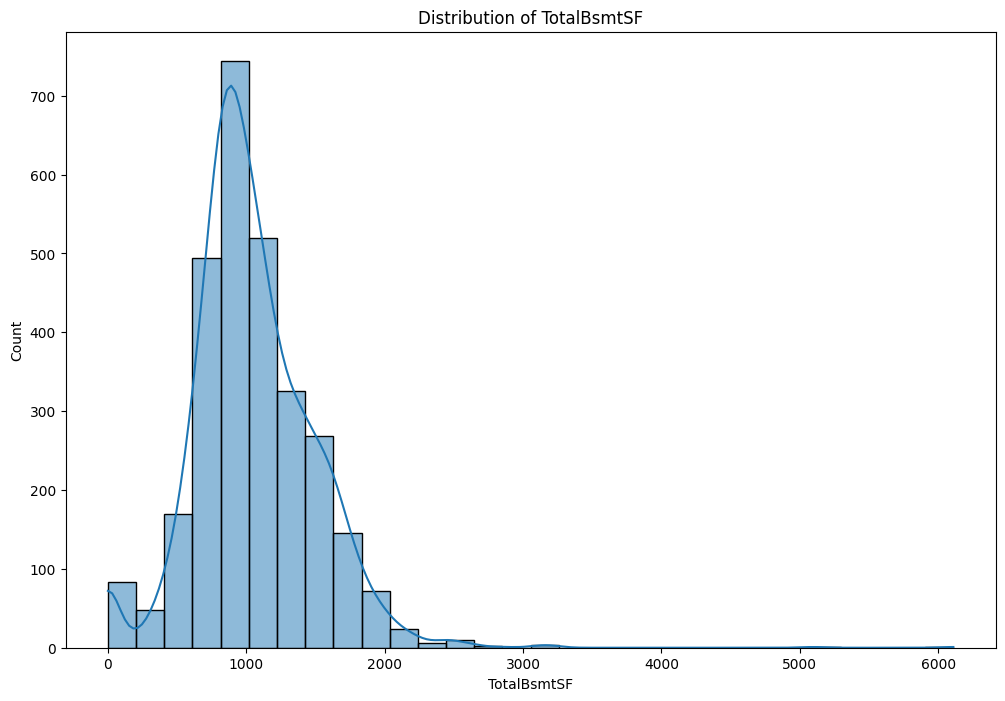

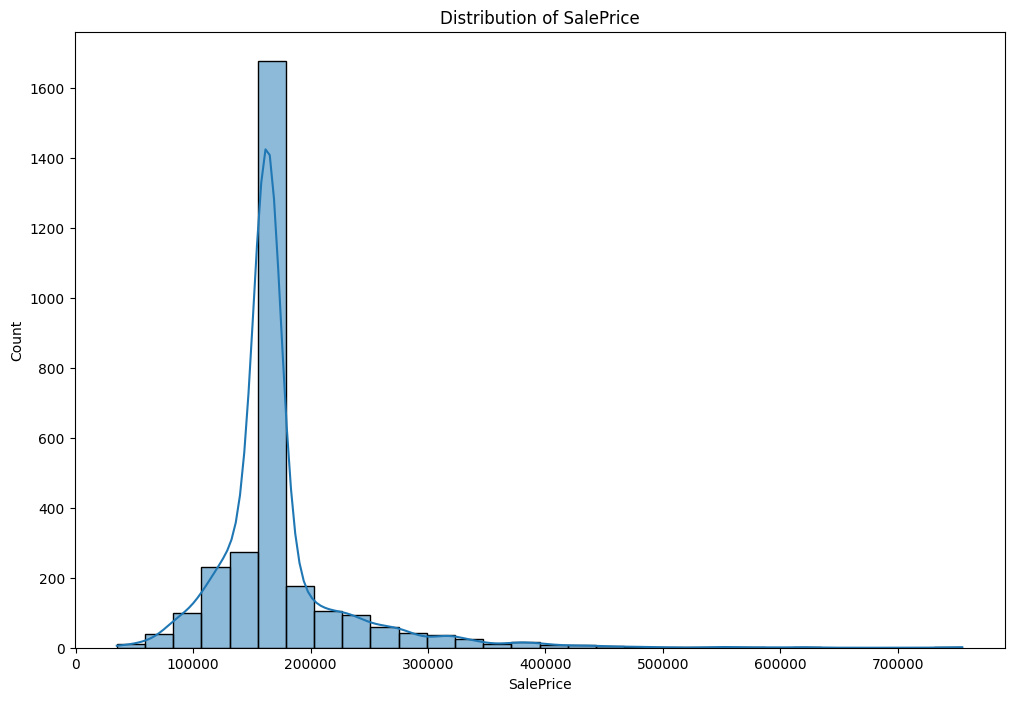

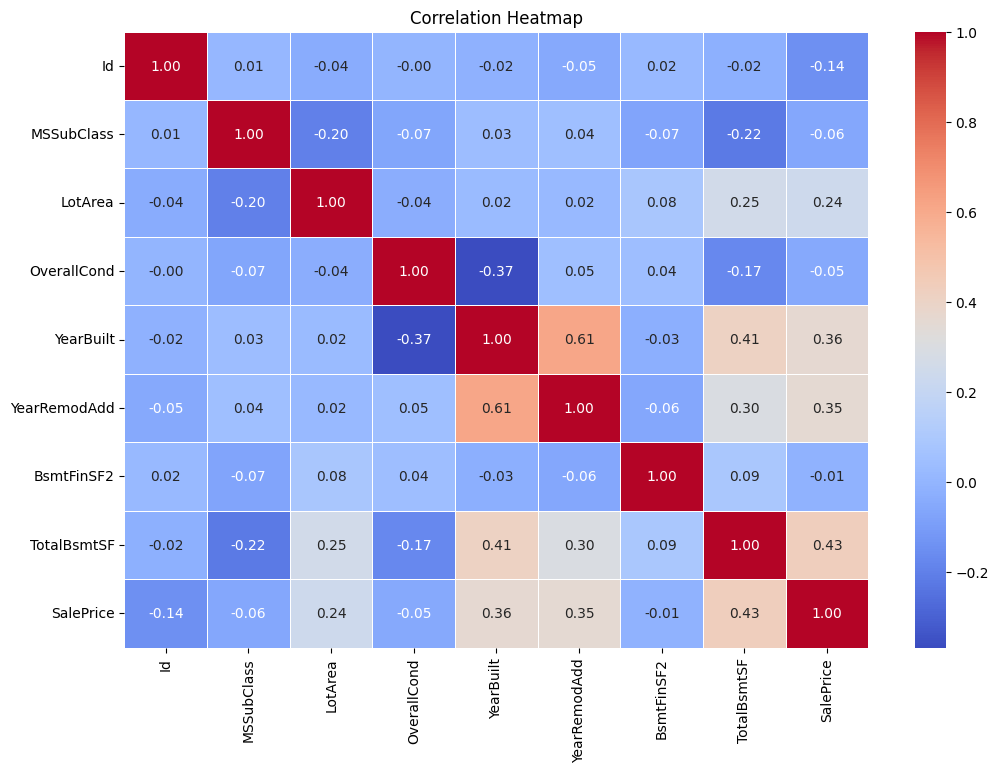

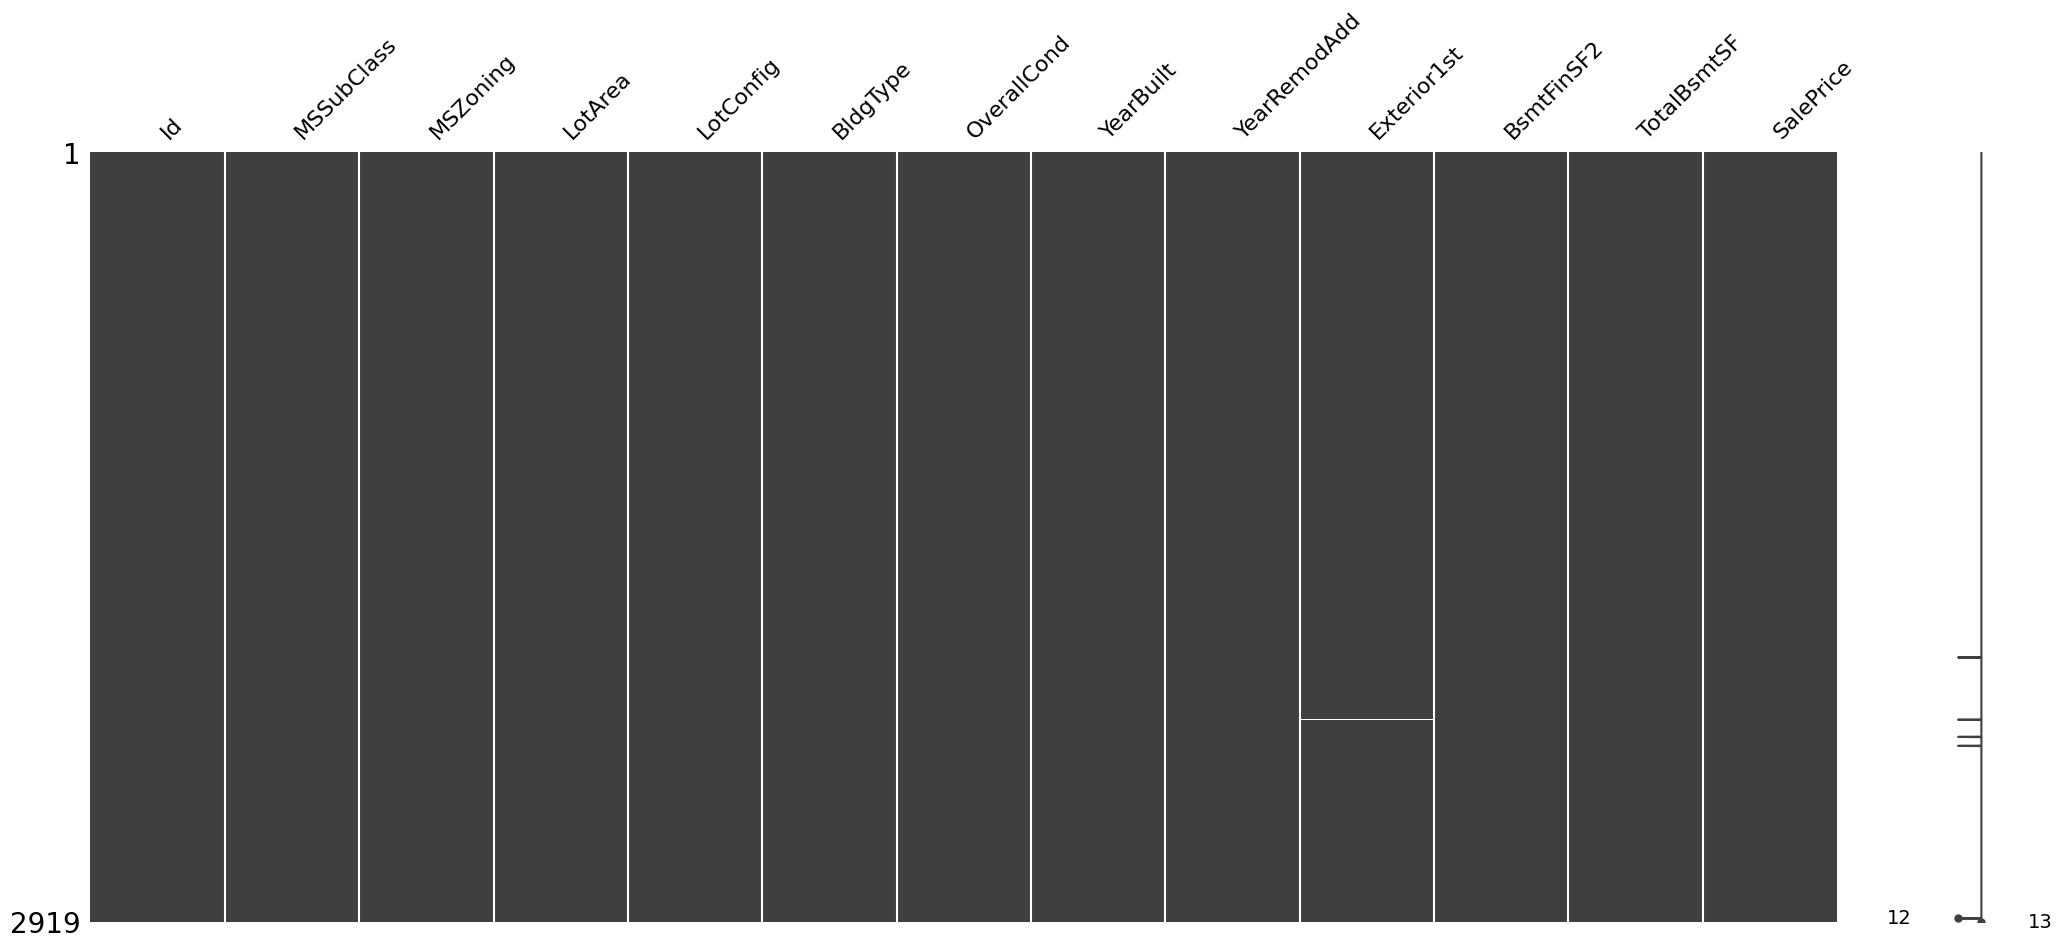

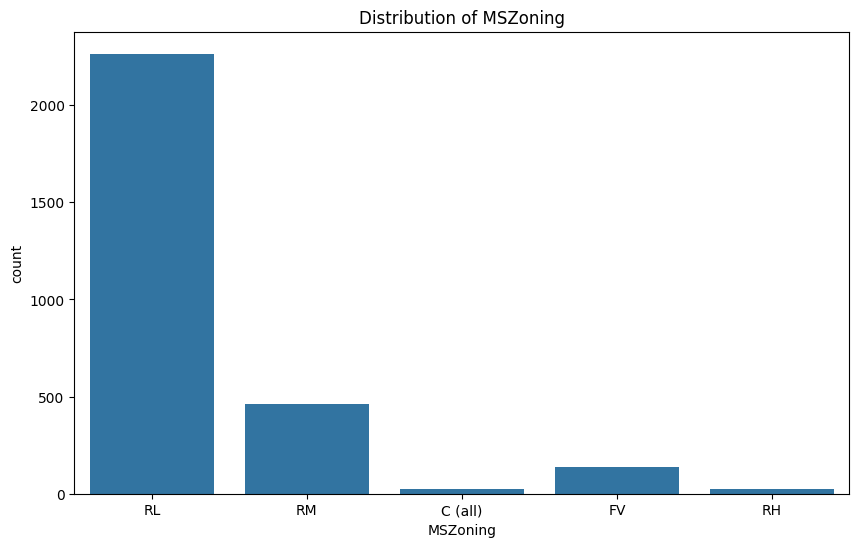

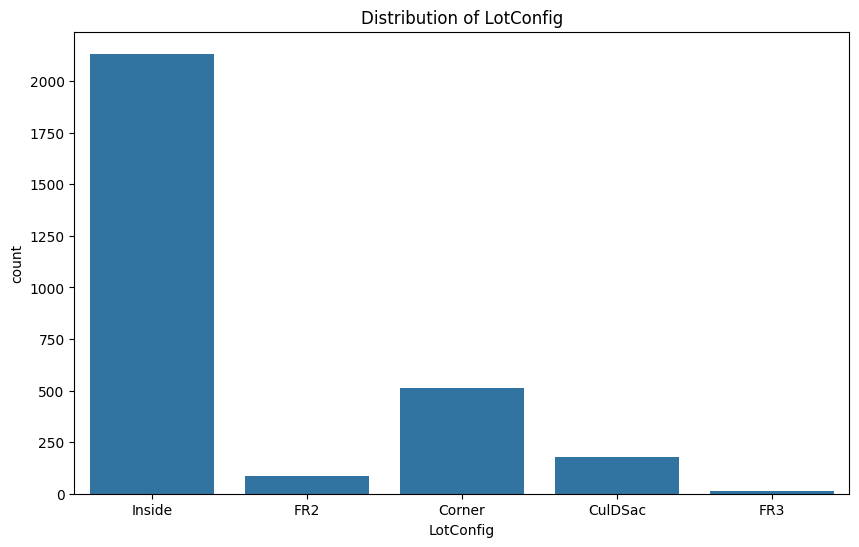

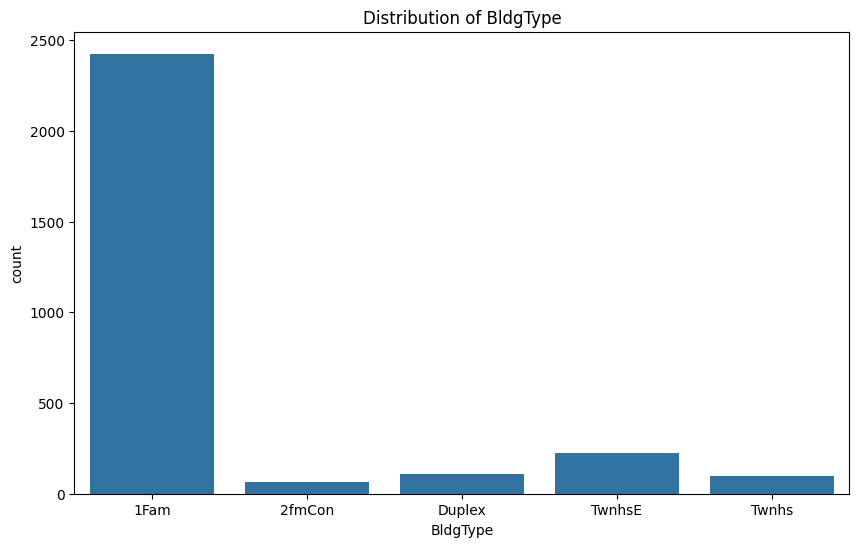

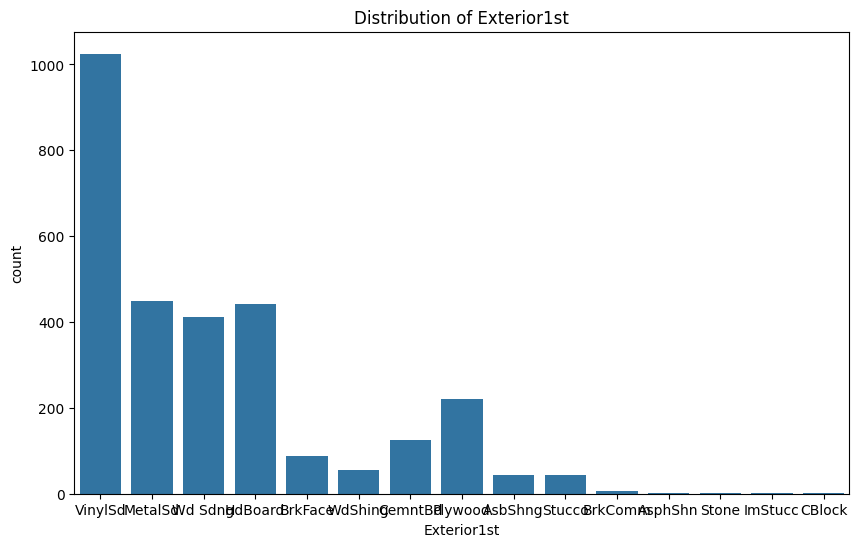

Skewed features: 
LotArea         12.829025
BsmtFinSF2       4.148275
SalePrice        3.023498
MSSubClass       1.376165
TotalBsmtSF      1.163214
OverallCond      0.570605
Id               0.000000
YearRemodAdd    -0.451252
YearBuilt       -0.600114
dtype: float64
Preprocessed Training Data:
[[ 1.42449374  1.81401439 -2.76787952 -0.50674666  0.14560644 -0.39261628
  -0.36757962  0.00825022 -0.22234703 -0.09294788  0.53327145 -0.4332329
  -0.24576338 -0.18216981 -0.07482394  0.61513765 -0.14487303 -0.1955485
   5.41522625 -0.29333686 -0.02927909 -0.03586711 -0.18342084  0.
  -0.21807099 -0.42061303  0.         -0.42483566  3.47054646 -0.02927909
  -0.11599509 -0.73293623 -0.40497898 -0.14018079]
 [ 0.30023624 -1.1253166  -0.33265681 -0.50674666  1.14313512  1.09228521
  -0.36757962  0.41991018  4.49747404 -0.09294788 -1.87521759 -0.4332329
  -0.24576338 -0.18216981 -0.07482394  0.61513765 -0.14487303 -0.1955485
  -0.18466449 -0.29333686 -0.02927909 -0.03586711 -0.18342084  0.
  -0.218

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/HousePricePrediction.xlsx - Sheet1.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check the shape of the dataset (rows and columns)
print(f"Dataset shape: {data.shape}")

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Handle missing values: Impute missing numerical columns with median values
numerical_cols = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Check again for missing values after imputation
print("Missing values after imputation:")
print(data.isnull().sum())

# Explore the basic statistics of numerical features
print(data.describe())

# Visualizing distributions of numerical features
numerical_features = data.select_dtypes(include=[np.number])
for feature in numerical_features.columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualizing missing data (if any)
import missingno as msno
msno.matrix(data)
plt.show()

# Visualize categorical features (if any)
categorical_cols = data.select_dtypes(include=[object]).columns
for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

# Encode categorical features using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Check if there are any highly skewed numerical features
skewed_features = data_encoded[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print(f"Skewed features: \n{skewed_features}")

# Apply log transformation to skewed features (if needed)
for feature in skewed_features.index:
    if skewed_features[feature] > 1:  # threshold can be adjusted
        data_encoded[feature] = np.log1p(data_encoded[feature])

# Split the dataset into training and testing sets
X = data_encoded.drop('SalePrice', axis=1)  # Assuming 'SalePrice' is the target column
y = data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the preprocessed data
print("Preprocessed Training Data:")
print(X_train_scaled[:5])

# Conclusion
# Based on the EDA, you should have observed the distribution of the data, correlations, missing data, and outliers.
# You can now use this cleaned and preprocessed data to train machine learning models.
